## Imports
** Import pandas, numpy, matplotlib,and seaborn.

# Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [ ]:
customers = pd.read_csv("/content/Ecommerce Customers.csv")

**Check the head of customers, and check out its info() and describe() methods.**

In [ ]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

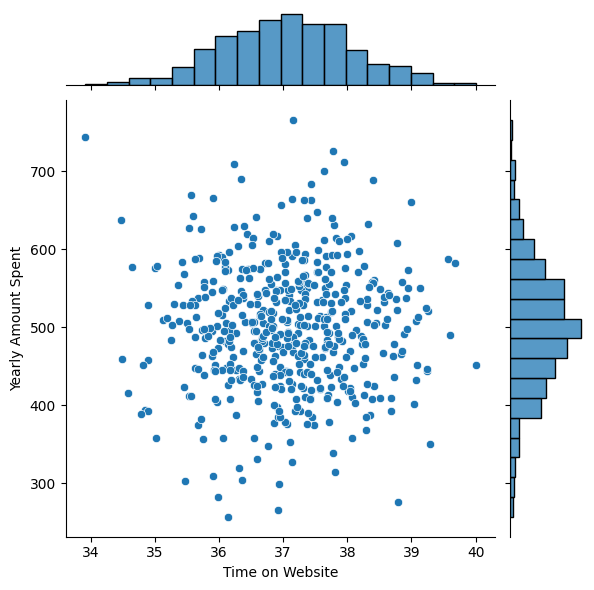

In [ ]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

** Do the same but with the Time on App column instead. **

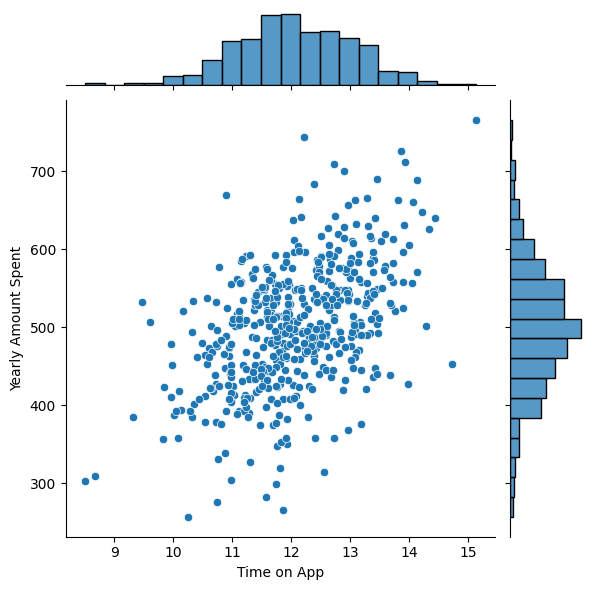

In [ ]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

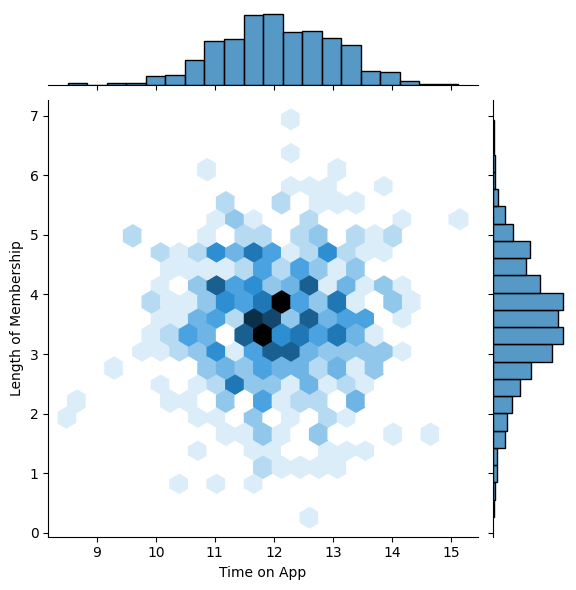

In [ ]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

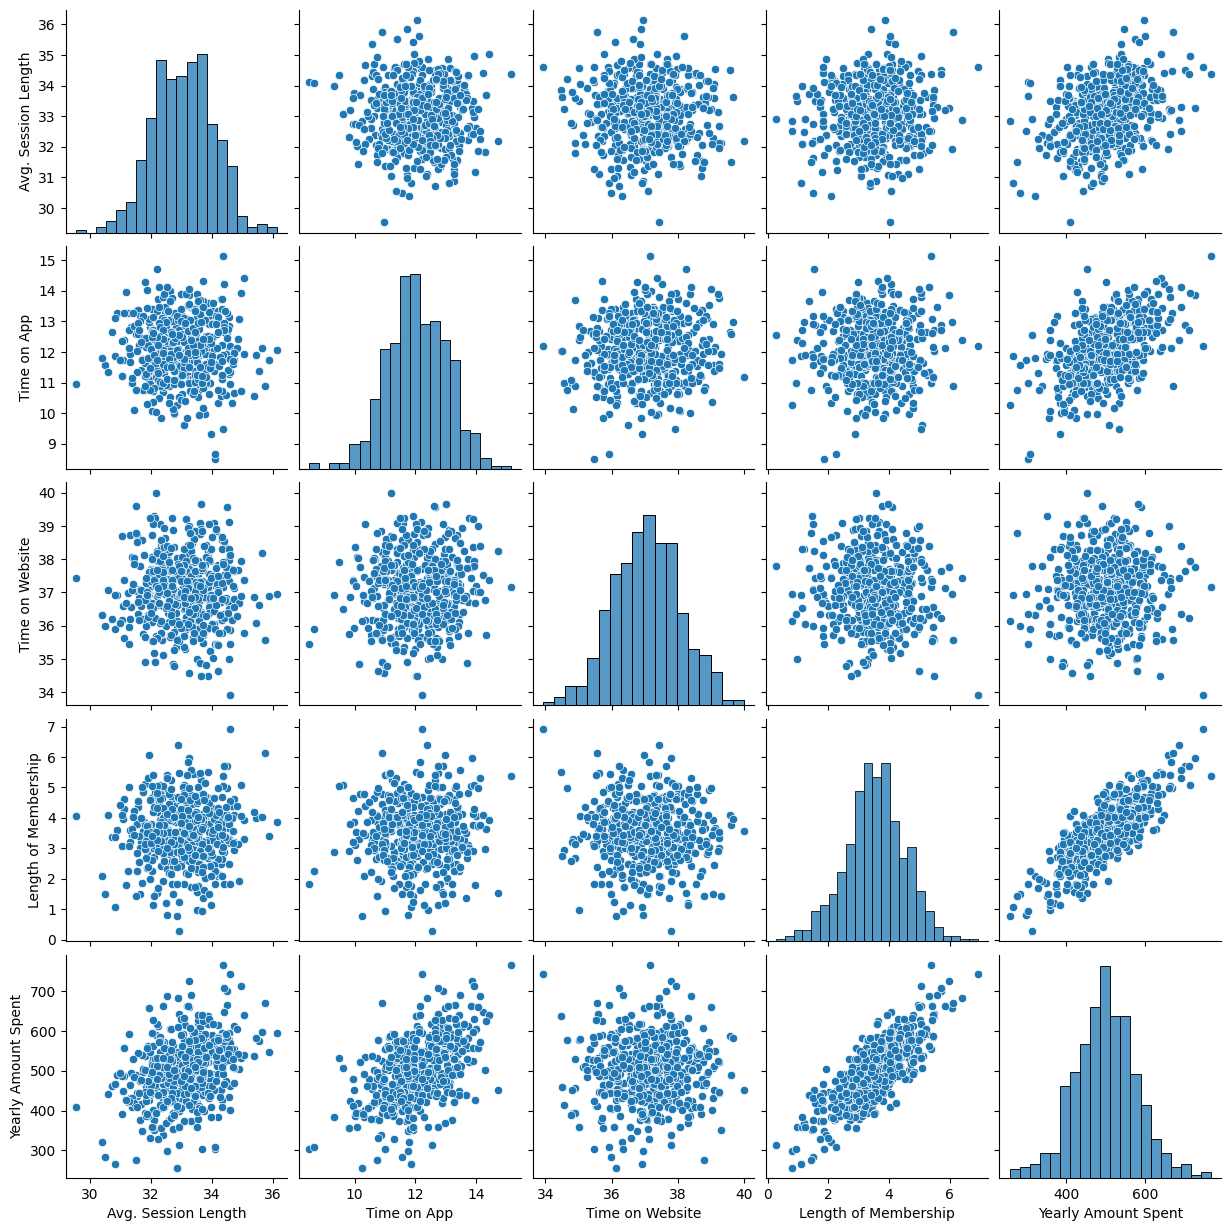

In [ ]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [ ]:
# Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

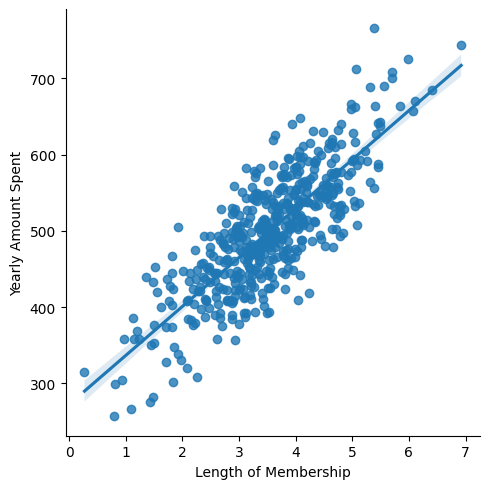

In [ ]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [ ]:
y = customers['Yearly Amount Spent']

In [ ]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [ ]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [ ]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [ ]:
predictions = lm.predict( X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

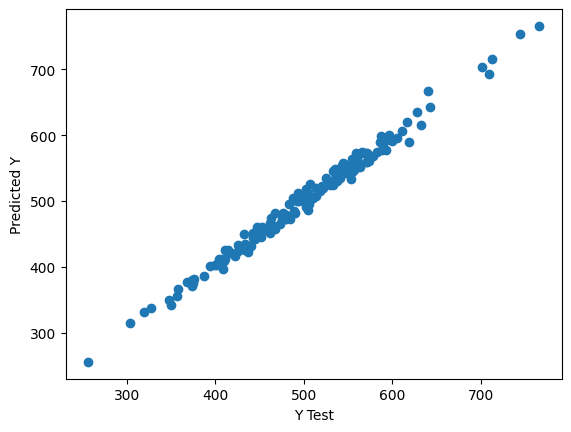

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2:', r2_score(y_test, predictions))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624
r2: 0.9890046246741234


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

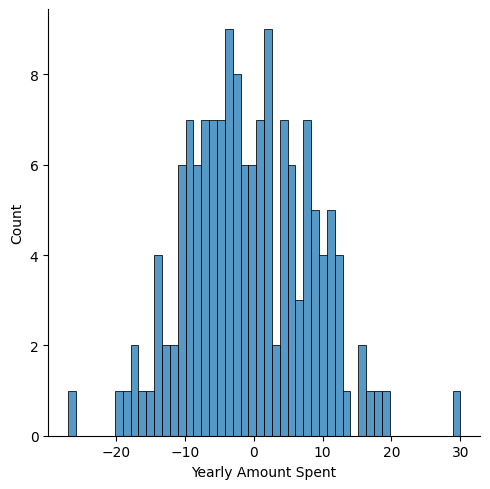

In [ ]:
sns.displot((y_test-predictions),bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**

## Model Selection

After we built our Machine Learning models, some questions remained unanswered:

* How to deal with the bias variance tradeoff when building a model and evaluating its performance ?
* How to choose the optimal values for the hyperparameters (the parameters that are not learned) ?
* How to find the most appropriate Machine Learning model for my business problem ?

## Cross Validation

**Cross validation is a technique for assessing how the statistical analysis generalises to an independent data set**.

It is a technique for evaluating machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data. Using cross-validation, there are high chances that we can detect over-fitting with ease.

There are several cross validation techniques such as :-
1. K-Fold Cross Validation
2. Leave P-out Cross Validation
3. Leave One-out Cross Validation
4. Repeated Random Sub-sampling Method
5. Holdout Method

Here, We will split the data into training, validation and test set.

Train models on the training data, measure their accuracy on the validation data, tweak the model to be more accurate and measure the new accuracy, once we're happy with its performance we measure its generalisability on the test data.


In [ ]:
# Perform first split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform the second split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)


In [ ]:
len(X_train_temp)

400

In [ ]:
len(X_train), len(X_valid), len(X_test)

(300, 100, 100)

## Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [ ]:
regressor = LinearRegression()
mlr = regressor.fit(X_train, y_train)

In [ ]:
scoring(mlr, X_valid, y_valid)

Model Performance
Mean Absolute Error: 8.6288.
Mean Squared Error: 121.7114.
R^2 Score = 0.9808.
Accuracy = 98.27%.


## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR()
mlr_SVR = regressor.fit(X_train, y_train)

In [ ]:
scoring(mlr_SVR, X_valid, y_valid)

Model Performance
Mean Absolute Error: 64.0517.
Mean Squared Error: 6234.8986.
R^2 Score = 0.0140.
Accuracy = 86.47%.


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0)
mlr_DT = regressor.fit(X_train, y_train)

In [ ]:
scoring(mlr_DT, X_valid, y_valid)

Model Performance
Mean Absolute Error: 25.6864.
Mean Squared Error: 1103.5928.
R^2 Score = 0.8255.
Accuracy = 94.64%.


In [ ]:
mlr_DT_feats = pd.DataFrame(mlr_DT.feature_importances_, index=X_train.columns, columns=['Feature Importance'])
mlr_DT_feats

,Feature Importance
Avg. Session Length,0.056679
Time on App,0.220264
Time on Website,0.014082
Length of Membership,0.708975


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_regressor = RandomForestRegressor(random_state=42)
rf = rf_regressor.fit(X_train, y_train)

In [ ]:
scoring(rf, X_valid, y_valid)

Model Performance
Mean Absolute Error: 16.3242.
Mean Squared Error: 463.4425.
R^2 Score = 0.9267.
Accuracy = 96.59%.


In [ ]:
rf_feats = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['Feature Importance'])
rf_feats

,Feature Importance
Avg. Session Length,0.071517
Time on App,0.197515
Time on Website,0.012117
Length of Membership,0.718851


## Extreme Gradient Boosting (XG Boost)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_regressor = XGBRegressor(random_state=42)
xgb = xgb_regressor.fit(X_train, y_train)

In [ ]:
scoring(xgb, X_valid, y_valid)

Model Performance
Mean Absolute Error: 14.8200.
Mean Squared Error: 364.6822.
R^2 Score = 0.9423.
Accuracy = 96.94%.


In [ ]:
xgb_feats = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['Feature Importance'])
xgb_feats

,Feature Importance
Avg. Session Length,0.054499
Time on App,0.174208
Time on Website,0.005697
Length of Membership,0.765596


## K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
mlr_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = xgb_regressor = XGBRegressor(random_state=42)

In [ ]:
# Define a function that compares the CV perfromance of a set of predetrmined models
def cv_comparison(models, X, y, cv):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of all CVs to the list
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs


In [ ]:
models = [mlr_reg, rf_reg, xgb_reg]

In [ ]:
comp, maes, mses, r2s, accs = cv_comparison(models, X_train_temp, y_train_temp, 4)

In [ ]:
comp.columns = ['Multiple Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']
comp

,Multiple Linear Regression,Random Forest,Extreme Gradient Boosting
Mean Absolute Error,7.8125,14.7474,13.6662
Mean Squared Error,97.8883,421.4251,307.5313
R^2,0.9849,0.9350,0.9525
Accuracy,98.4437,97.0622,97.2776


In [ ]:
# Create DataFrame for all R^2s
r2_comp = pd.DataFrame(r2s, index=comp.columns, columns=['1st Fold', '2nd Fold', '3rd Fold', '4th Fold'])

# Add a column for the averages
r2_comp['Average'] = np.round(r2_comp.mean(axis=1),4)
r2_comp

,1st Fold,2nd Fold,3rd Fold,4th Fold,Average
Multiple Linear Regression,0.9859,0.9853,0.9828,0.9855,0.9849
Random Forest,0.9551,0.9221,0.9180,0.9446,0.9350
Extreme Gradient Boosting,0.9533,0.9541,0.9465,0.9560,0.9525


## Hyperparamter Tuning

## Steps for Hyperparameter Tuning

1. **Define the Hyperparameters**: Identify the hyperparameters that you want to tune.
2. **Choose a Search Space:** Determine the range or set of possible values for each hyperparameter.
3. **Select a Tuning Strategy:** Common strategies include Grid Search, Random Search, and Bayesian Optimization
4. **Define Evaluation Metric:** Choose an appropriate evaluation metric to assess the performance of your model for different hyperparameter settings.
5. **Evaluate and Compare Results:** Analyze the results obtained from the hyperparameter search.
6. **Validate on Holdout Set:** After identifying the best hyperparameter values, it is essential to validate the model's performance on a separate holdout set or cross-validation to get a reliable estimate of how the model will perform on unseen data.

## Hyperparameter Optimisation for Random Forest (Using Random Search Cross Validation)

We will try to adjust the following hyperparameters:
* n_estimators,
* max_features,
* max_depth,
* criterion,
* min_samples_split,
* bootstrap,
* min_impurity_decrease.

In [ ]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['squared_error', 'absolute_error']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

In [ ]:
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

In [ ]:
rf_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1500, 2000],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['squared_error', 'absolute_error'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'bootstrap': [True, False]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_base = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid,
                               n_iter = 10, cv = 3,random_state = 42,
                               n_jobs = -1)

In [ ]:
rf_random.fit(X_train_temp, y_train_temp)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_impurity_decrease': [0.0, 0.05,
                                                                  0.1],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1500, 2000]},
                   random_state=42)

In [ ]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_impurity_decrease': 0.0,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'squared_error',
 'bootstrap': True}

In [ ]:
rf_random.best_score_

0.9326896699380572

## Hyperparameter Optimisation for Extreme Gradient Boosting

For the Extreme Gradient Booster We will try to change the following hyperparameters:
* n_estimators,
* max_depth,
* min_child_weight,
* tree_method,
* eta,
* objective,
* n_thread,
* seed,
* gamma

In [ ]:
# Number of trees to be used
xgb_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

# Maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]

# Minimum number of instaces needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist']

# Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

# Learning objective used
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

In [ ]:
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}

xgb_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'tree_method': ['auto', 'exact', 'approx', 'hist'],
 'eta': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6],
 'gamma': [0, 0, 0, 0, 0, 0],
 'objective': ['reg:squarederror', 'reg:squaredlogerror']}

In [ ]:
# Create the model to be tuned
xgb_base = XGBRegressor()

# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid,
                                n_iter = 10, cv = 3, verbose = 2,
                                random_state = 420, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train_temp, y_train_temp)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'eta': [0.1, 0.2, 0.30000000000000004,
                                                0.4, 0.5, 0.6],
                                        'gamma': [0, 0, 0, 0, 0, 0],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'objective': ['reg:squarederror',
                                                      'reg:squaredlogerror'],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   random_state=420, verbose=2)

In [ ]:
xgb_random.best_params_

{'tree_method': 'exact',
 'objective': 'reg:squarederror',
 'n_estimators': 400,
 'min_child_weight': 6,
 'max_depth': 4,
 'gamma': 0,
 'eta': 0.1}

In [ ]:
xgb_random.best_score_

0.9583390999360638

## Finally using out Test Data

In [ ]:
# Create the final Random Forest
rf_final = RandomForestRegressor(n_estimators= 200,
                                min_samples_split= 6,
                                min_impurity_decrease= 0.0,
                                max_features= 'auto',
                                max_depth= None,
                                criterion= 'squared_error',
                                bootstrap= True)

In [ ]:
xgb_final = XGBRegressor(tree_method= 'approx',
                         objective= 'reg:squarederror',
                         n_estimators= 1000,
                         min_child_weight= 8,
                         max_depth= 12,
                         gamma= 0,
                         eta = 0.6)

In [ ]:
rf_final.fit(X_train_temp, y_train_temp)
xgb_final.fit(X_train_temp, y_train_temp)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.6, eval_metric=None,
             feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=8, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
# Define a function that compares all final models
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return scores

In [ ]:
final_scores = final_comparison([rf_final, xgb_final], X_test, y_test)

In [ ]:
final_scores.columns  = ['Random Forest', 'Extreme Gradient Boosting']
final_scores

,Random Forest,Extreme Gradient Boosting
Mean Absolute Error,14.3314,15.5476
Mean Squared Error,351.5455,382.9839
R^2,0.9290,0.9227
Accuracy,96.8638,96.7315


## Save desired Model

In [ ]:
import joblib

In [ ]:
filename = 'RF_trained_model.joblib'
joblib.dump(rf_final, filename)

['RF_trained_model.joblib']

In [ ]:
import pickle

In [ ]:
filename = 'RF_trained_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_final, file)

## Load Model

In [ ]:
# Using joblib:
loaded_model = joblib.load('RF_trained_model.joblib')

In [ ]:
# Using pickle:
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

## Model Explainability with SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.8 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Global Explainability with SHAP

Global explainability can be understood as understanding the overall importance of each feature in the model across the entire dataset and providing a general knowledge of the data and the underlying patterns.

In [ ]:
explainer = shap.TreeExplainer(rf_final)
shap_values = explainer.shap_values(X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


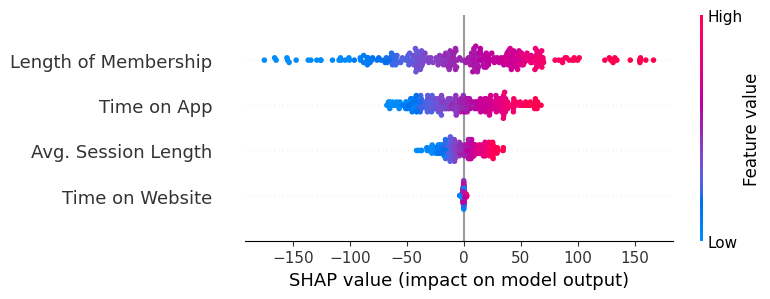

In [ ]:
shap.summary_plot(shap_values, X_train)

This chart contains a ton of information about the model at the aggregate level, but it may be a bit overwhelming for the uninitiated, so let me walk through what we are looking at:
1. The individual dots represent specific training examples.
2. The y-axis are the input features ranked by magnitude of aggregate impact on the model output. The colors of the dots represent the value of the feature on the y-axis.
3. The x-axis are the SHAP values, which as the chart indicates, are the impacts on the model output. These are the values that you would sum to get the final model output for any specific example.


## Local Explainability with SHAP

In [ ]:
explainer = shap.Explainer(rf_final,X_train)
shap_values_2 = explainer(X_train)

In [ ]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
421,31.574138,12.941556,36.725277,4.560396
250,32.672944,12.276057,37.192794,3.982472
247,34.402410,14.220979,37.523197,4.077775
26,33.541231,12.783892,36.430650,4.648199
198,33.506092,11.659833,37.281393,4.478713


In [ ]:
y_train

421    544.409272
250    523.633935
247    647.619456
26     619.895640
198    560.560161
          ...    
157    744.221867
228    458.376911
27     486.838935
480    551.023002
245    409.070472
Name: Yearly Amount Spent, Length: 300, dtype: float64

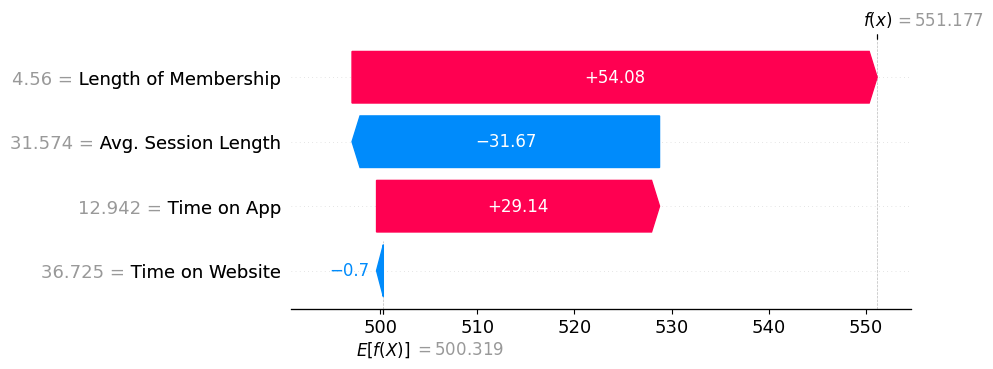

In [ ]:
shap.plots.waterfall(shap_values_2[0])

E[f(x)] = 500.503 gives the average predicted Yearly Amount Spent across all 500 Observations. f(x) = 551.177 is the predicted number of Yearly Amount Spent for this particular Observation. The SHAP values are all the values in between. For example, the Length of Membership has increased the predicted Yearly Amount Spent by 54.08